In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
VAE_HPC_data = pd.read_csv('data/VAE_reconloss_data.tsv', header = None, sep = '\t').squeeze()
VAE_HPC_data

0     843.446289
1       1.300923
2       3.880726
3       4.521068
4       0.357393
5       0.124544
6       0.095245
7       0.092916
8       0.090325
9       0.088681
10      0.087506
11      0.086471
12      0.118357
13      0.081783
14      0.124819
15      0.123986
16      0.073293
17      0.072377
18      0.071513
19      0.070943
20      0.080297
21      0.076107
22      0.075149
23      0.066611
24      0.064026
25      0.063997
26      0.063071
27      0.101001
28      0.063351
29      0.067895
30      0.064764
31      0.065964
32      0.065719
33      0.061162
34      0.060244
35      0.061628
36      0.081275
37      0.059163
38      0.064858
39      0.060181
40      0.055870
41      0.055012
42      0.065575
43      0.057195
44      0.054841
45      0.054000
46      0.053324
47      0.059492
48      0.054383
49      0.054855
Name: 0, dtype: float64

Text(0.5, 0, 'x-Values')

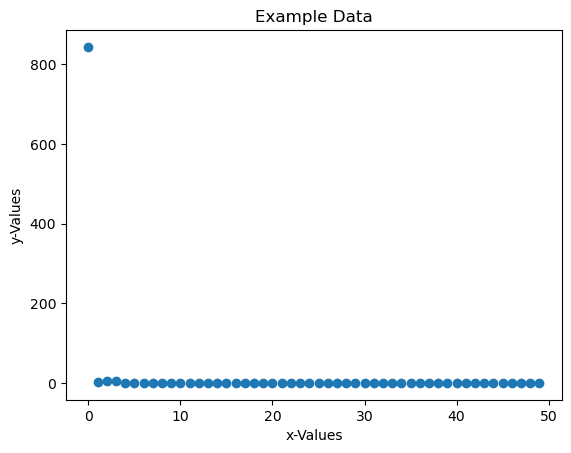

In [3]:
x = np.arange(len(VAE_HPC_data))
y = VAE_HPC_data

# Create a plot
ax = plt.axes()
ax.scatter(x, y)
ax.set_title('Example Data')
ax.set_ylabel('y-Values')
ax.set_xlabel('x-Values')

In [4]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

def monoLog(x, C1, lambda1, C2, lambda2):
    return C1 * np.exp((-lambda1*x)) + C2 * np.exp(-lambda2 * x)

In [5]:
p0 = (900, .1, 500)
p1 = (627.7236, 1.6182, .109077, .0149)

params, cv = curve_fit(monoExp, x[3:], y[3:], p0)
params2, cv = curve_fit(monoLog, x, y, p1)
C1, lambda1, C2, lambda2= params2
params2


C:\Users\morte\AppData\Local\Temp\ipykernel_16512\3298789082.py:5: RuntimeWarning: overflow encountered in exp
  return C1 * np.exp((-lambda1*x)) + C2 * np.exp(-lambda2 * x)


array([8.39418466e+02, 2.47793063e+01, 4.02782262e+00, 2.79659015e-01])

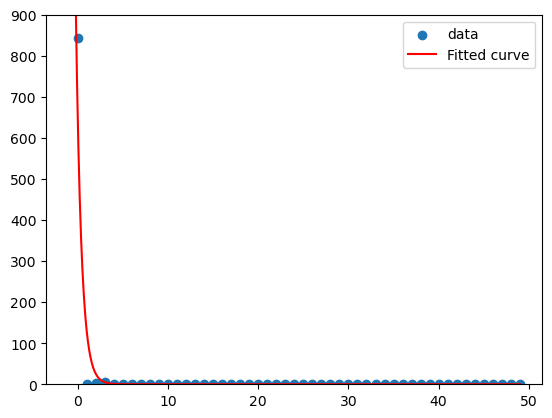

In [6]:
# set parameters for curve fit (found using a 2 compartment pharmacokinetic model)
C1, lambda1, C2, lambda2 = 627.7236, 1.6182, .109077, .0149 

# Create the fitted curve
x_fitted = np.linspace(-1, np.max(x), 1000)
y_fitted =  C1 * np.exp((-lambda1*x_fitted)) + C2 * np.exp(-lambda2 * x_fitted)

# # Plot
ax = plt.axes()
ax.scatter(x, y, label='data')
ax.plot(x_fitted, y_fitted, 'r', label='Fitted curve')

plt.ylim(0,900)
ax.legend()
plt.show()

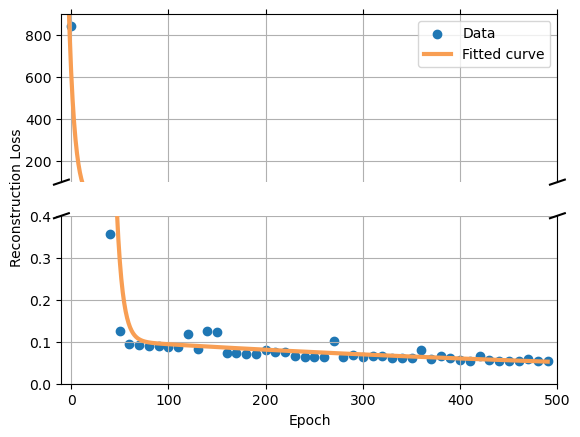

In [12]:
f, (splitax, splitax2) = plt.subplots(2,1, sharex=True)

splitax.scatter(x, y, label='Data')
splitax2.scatter(x, y)

splitax.plot(x_fitted, y_fitted, color='#F89E53', label='Fitted curve', linewidth=3)
splitax2.plot(x_fitted, y_fitted, color='#F89E53', label='Fitted curve', linewidth=3)

splitax.set_ylim(100, 900)
splitax2.set_ylim(0, .4)

splitax.spines['bottom'].set_visible(False)
splitax2.spines['top'].set_visible(False)
splitax.xaxis.tick_top()
splitax.tick_params(labeltop=False)
splitax2.xaxis.tick_bottom()

d = .015

kwargs = dict(transform=splitax.transAxes, color ='k', clip_on=False)
splitax.plot((-d, +d), (-d, +d), **kwargs)
splitax.plot((1-d, 1+d), (-d, +d), **kwargs)

kwargs.update(transform=splitax2.transAxes)
splitax2.plot((-d, +d), (1-d, 1+d), **kwargs)
splitax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

plt.xlim(0, x[-1])
locs, labels = plt.xticks()
labels = [int(item) * 10 for item in locs]
plt.xticks(locs, labels)
plt.xlim(-1, x[-1] +1)
splitax.legend()

splitax.grid()
splitax2.grid()

plt.xlabel("Epoch")
splitax2.set_ylabel('Reconstruction Loss', ha='left', y=.7)
plt.show()

In [8]:
FNN_data = pd.read_csv('data/FNN_training_data.tsv', sep = ',|:', header = None)
FNN_data

C:\Users\morte\AppData\Local\Temp\ipykernel_16512\52805051.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  FNN_data = pd.read_csv('data/FNN_training_data.tsv', sep = ',|:', header = None)


,0,1,2,3
0,Epoch 0,Train Loss 1.218973,Train acc 0.162098,Valid acc 0.160327
1,Epoch 2,Train Loss 0.126423,Train acc 0.115789,Valid acc 0.114525
2,Epoch 4,Train Loss 0.096725,Train acc 0.090856,Valid acc 0.089300
3,Epoch 6,Train Loss 0.079395,Train acc 0.075691,Valid acc 0.075035
4,Epoch 8,Train Loss 0.068477,Train acc 0.066022,Valid acc 0.065628
...,...,...,...,...
1995,Epoch 3990,Train Loss 0.018284,Train acc 0.018278,Valid acc 0.018425
1996,Epoch 3992,Train Loss 0.018282,Train acc 0.018288,Valid acc 0.018483
1997,Epoch 3994,Train Loss 0.018282,Train acc 0.018285,Valid acc 0.018568
1998,Epoch 3996,Train Loss 0.018277,Train acc 0.018281,Valid acc 0.018562


In [9]:
FNN_data = FNN_data.replace('\D\D+', '', regex = True)
FNN_data = FNN_data.astype(float)
FNN_data = FNN_data.set_index(0)
FNN_data.index.name = None
FNN_data

,1,2,3
0.0,1.218973,0.162098,0.160327
2.0,0.126423,0.115789,0.114525
4.0,0.096725,0.090856,0.089300
6.0,0.079395,0.075691,0.075035
8.0,0.068477,0.066022,0.065628
...,...,...,...
3990.0,0.018284,0.018278,0.018425
3992.0,0.018282,0.018288,0.018483
3994.0,0.018282,0.018285,0.018568
3996.0,0.018277,0.018281,0.018562


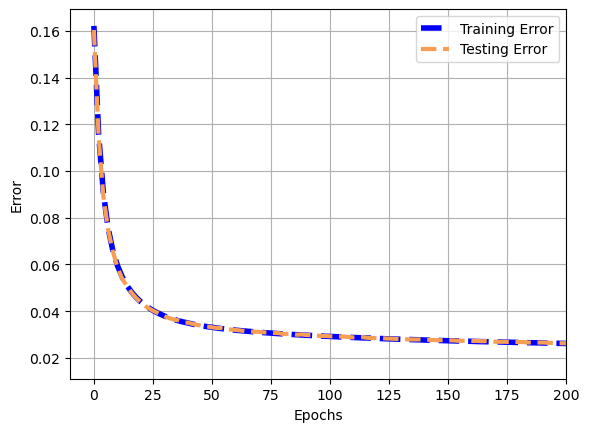

In [13]:
ax = plt.axes()

#ax.scatter(FNN_data.index, FNN_data[1])
ax.plot(FNN_data.index, FNN_data[2], color = 'b', label='Training Error', linestyle = '--', linewidth=4)
ax.plot(FNN_data.index, FNN_data[3], color='#F89E53', label='Testing Error',  linestyle = '--', linewidth=3)

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.xlim(-10,200)

ax.legend()
ax.grid()

plt.show()

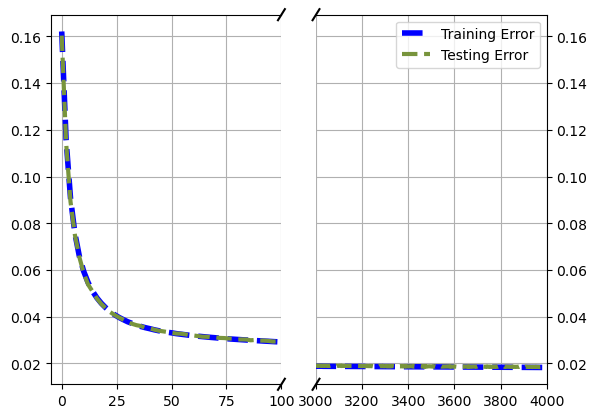

In [11]:
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

ax.plot(FNN_data.index, FNN_data[2], color = 'b', label='Training Error', linestyle = '--', linewidth=4)
ax.plot(FNN_data.index, FNN_data[3], color='#78943C', label='Testing Error',  linestyle = '--', linewidth=3)
ax2.plot(FNN_data.index, FNN_data[2], color = 'b', label='Training Error', linestyle = '--', linewidth=4)
ax2.plot(FNN_data.index, FNN_data[3], color='#78943C', label='Testing Error',  linestyle = '--', linewidth=3)

ax.set_xlim(-5,100)
ax2.set_xlim(3000,4000)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off')
ax2.yaxis.tick_right()

d = .015 # how big to make the diagonal lines in axes coordinates

kwargs = dict(transform = ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d), (1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

f.subplots_adjust(wspace = .15)

ax.grid()
ax2.grid()

ax2.legend()

plt.show()
